In [100]:
import pandas as pd
import numpy as np
import matplotlib

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [101]:
DF = pd.read_csv("../data/AAPL_OC_return.csv")

In [102]:
DF = DF["AAPL"] # Ignore any signal in date for now.

In [103]:
len(DF)

4625

In [104]:
train_data = DF[:3000]

In [105]:
len(train_data)

3000

In [106]:
print(max(DF), min(DF))

10.65909861 -11.6424473


<AxesSubplot:ylabel='Frequency'>

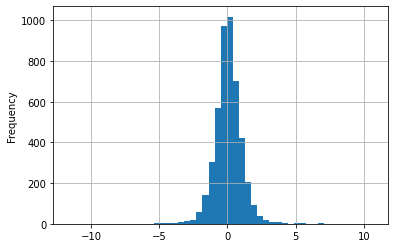

In [108]:
DF.plot.hist(grid=True, bins=50)

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))

train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1,1))

In [110]:

# scale data
# create feature-target set

In [111]:
X = []
y_hat = []
X_window = 50
for i in range(X_window, len(train_data)):
    X.append(train_data_scaled[i-X_window:i, 0])
    y_hat.append(train_data_scaled[i, 0])

In [112]:
X, y_hat = np.array(X), np.array(y_hat)


In [113]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [114]:
dropout_rate = 0.1
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(dropout_rate))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(dropout_rate))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(dropout_rate))

model.add(LSTM(units=50))
model.add(Dropout(dropout_rate))

model.add(Dense(units = 1))

In [115]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(X, y_hat, epochs = 100, batch_size = 32)

Epoch 1/100
93/93 [==============================] - 7s 79ms/step - loss: 0.0139

In [ ]:
test_data = DF[len(DF) - len(DF[3000:]) - X_window:].values

In [ ]:
test_data

len(test_data)

In [ ]:
test_data = test_data.reshape(-1, 1)
test_data = scaler.transform(test_data)

In [ ]:
test_X = []
for i in range(X_window, len(test_data)):
    test_X.append(test_data[i-X_window:i, 0])

In [ ]:
test_X = np.array(test_X)
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [ ]:
predictions = model.predict(test_X)
predictions = scaler.inverse_transform((predictions))
